# Perceptron from scratch

### Problem

We want to predict the outputs from the following inputs. Can you identify the pattern?

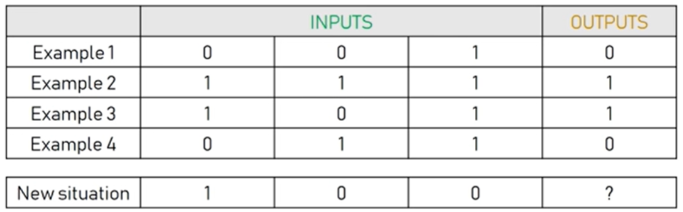

In [62]:
import numpy as np

# helper functions
def sigmoid(input):
    return 1 / (1 + np.exp(-input))
    
# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# define training outputs
y_train = np.array([[0,1,1,0]]).T

# why do we need to transpose?
# ... latter on we will calculate the error
# ... using the error function: error = y_train - predictions
# ... that is why the form of y_train needs to match predictions

# initialize random seed for random number genration
# ... having the same seed will ensure that the random numbers
# ... generated are the same each run, but random with respect to one another
np.random.seed(5)

# random synaptic weights
# ... because we want them from -1 to 1 we do some transformations.
# ... The shape is 3 x 1 since we have 3 input neurons
# ... we have 3 input neurons because we have 3 input values
# ... and the shape of the input layer is the same as the number of inputs in most cases
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 

print("Weights of synapses")
print(weights_for_synapses)

# training loop
for iteration in range(1):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 

Weights of synapses
[[-0.55601366]
 [ 0.74146461]
 [-0.58656169]]


## Does it work as expected?

In [52]:
print(predictions) # [0,1,1,0]

[[0.35742415]
 [0.4010455 ]
 [0.24184784]
 [0.53864848]]


No, it does not. We want to see the answer like this: [0,1,1,0] since we are predicting the output values. What is missing? The training step.

Before proceeding with the training process let's check if the values thus far make sense

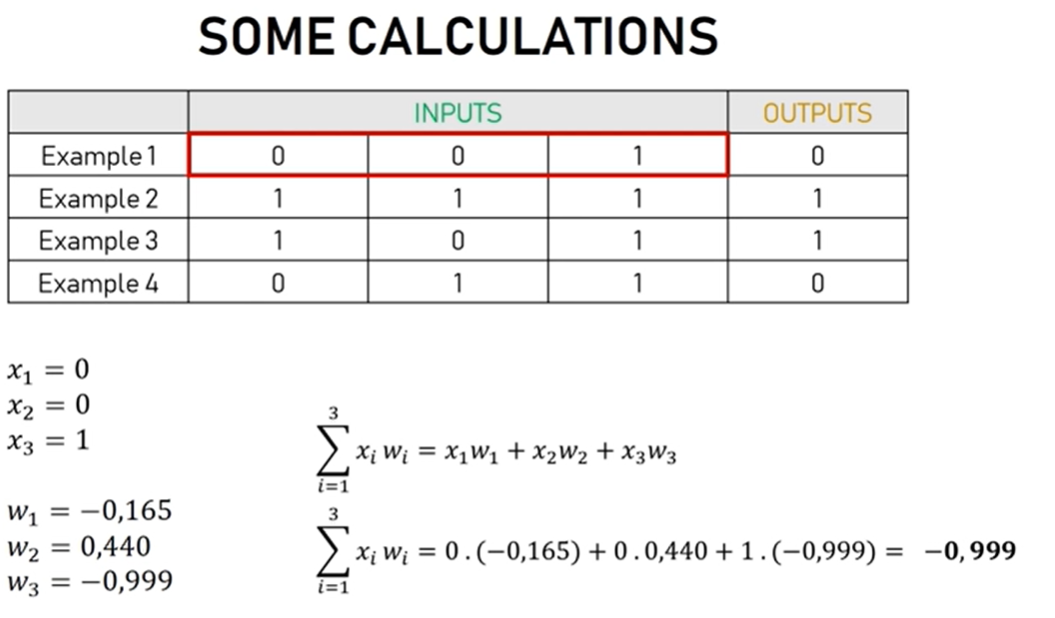

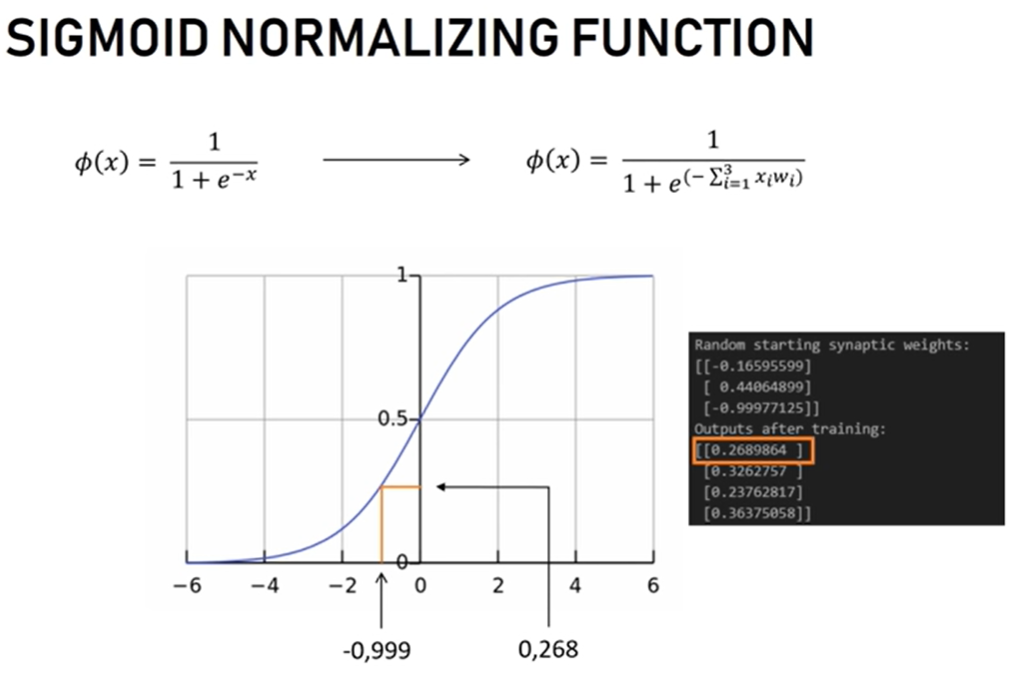

## Training process

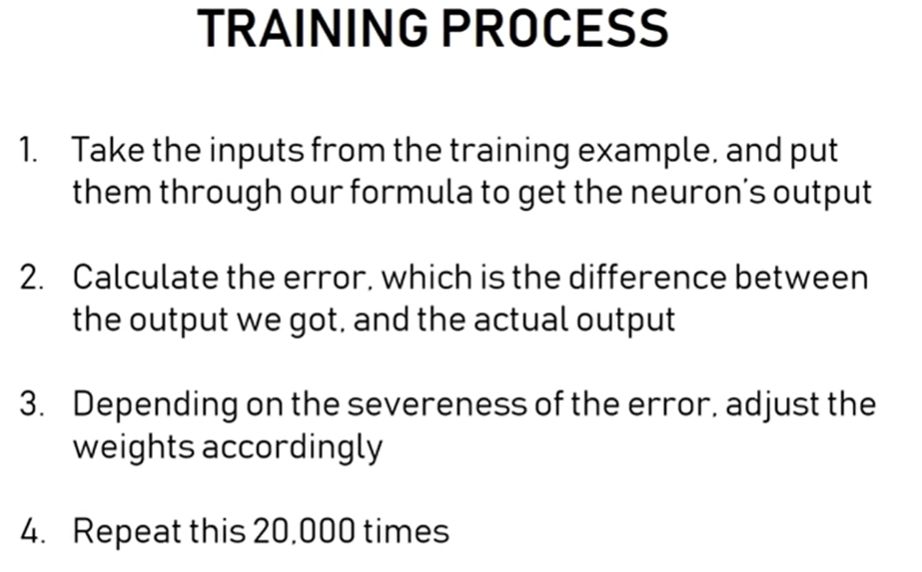

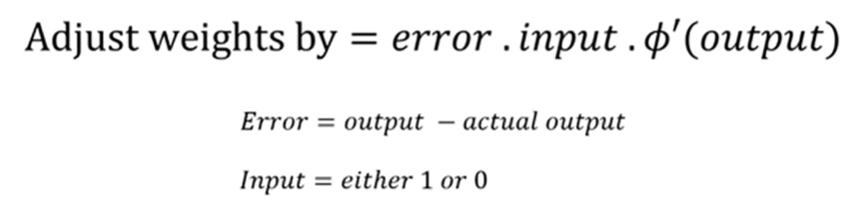

We will a formula that adjust the weights based on how confident the neuron is. If the neuron outputs large negative or
possitive values - it's confident, hence we don't want to adjust it's weights too much. If it's not confident 
(output is close to 0) then we want to adjust it more.

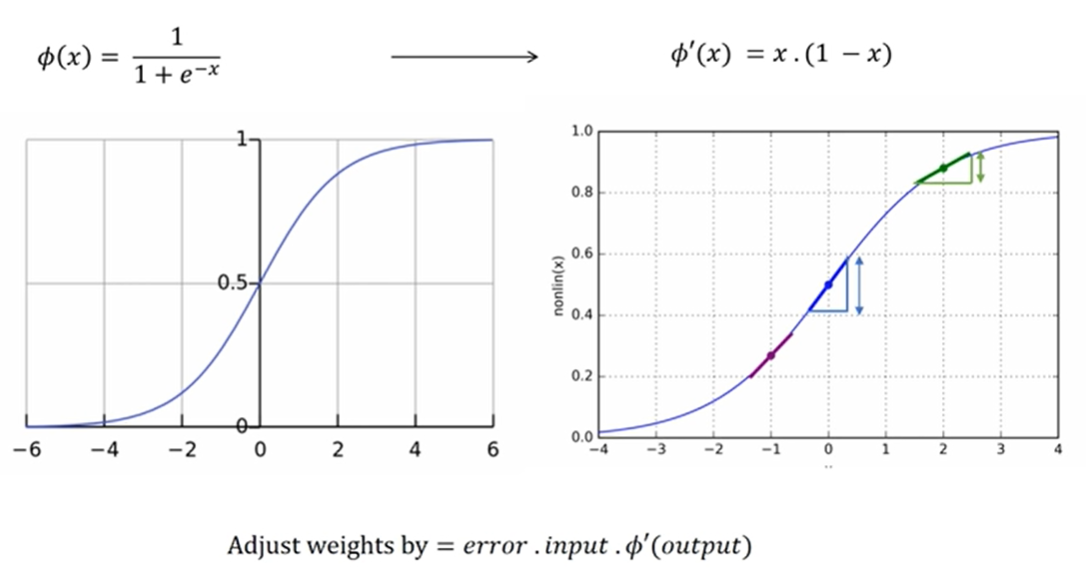

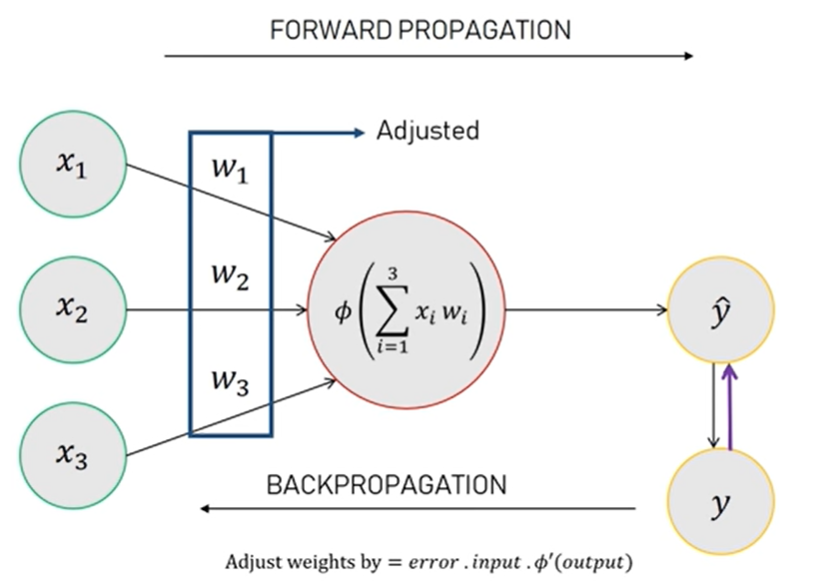

In [42]:
# First let's create the function that calculate the derivative of the sigmoid function
# ... we will learn more on how to take derivatives what they represent in the lecture on math
def sigm_derivative(x):
    return x * (1 - x)

Let's not rewrite the training loop, so that it would actually adjust the weights based on the error.

In [47]:
# training loop
for iteration in range(2):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)

Let's print the synaptic weights after.

In [48]:
print("Weights of synapses")
print(weights_for_synapses)

Weights of synapses
[[ 5.55719774]
 [-0.26811747]
 [-2.52797683]]


And the outputs after training

In [49]:
print(predictions) # [0,1,1,0]

[[0.07411465]
 [0.94038346]
 [0.95376497]
 [0.05767851]]


Seems to be pretty similar and not correct? What happened?

If you guessed that we did not train for long enough - you guessed it.

In [89]:
# training loop
for iteration in range(500000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions)

Weights of synapses
[[13.62648558]
 [-0.20348951]
 [-6.60991013]]
[[0.00134514]
 [0.99890191]
 [0.99910391]
 [0.00109775]]


## Let's see if we can train our model to work on new datasets with a different pattern

### Don't forget to restart the notebook, since we will be using the same variable names

In [2]:
import numpy as np

# helper functions
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

def sigm_derivative(x):
    return x * (1 - x)

# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# define training outputs
y_train = np.array([[0,1,0,1]]).T

# random synaptic weights
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 

# training loop
for iteration in range(300000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions)

Weights of synapses
[[-0.20373257]
 [13.11369974]
 [-6.35332876]]
[[0.00173792]
 [0.99858136]
 [0.00141804]
 [0.99884254]]


### Questions we could ask further:
1. How can we reuse the model to make predictions on new data?
- How small can I make training loop for it to be >95% certain?
- What would happen if I used different activation functions?
- How can I measure the time it takes to train this model?
- Would the time it takes to train the model increase significatly if I changed the activation function (and hence it's derivative)?
- The data is not very meaningfull to us. Could you come up with a scenario where the table of data we had could represent something in the real world?
- Any other questions you can think off?

## 1 .Reusing the model to make predictions on new data

First, let's ask ourselves - there does the prediction happen, which part of the code? The key function is this:

In [7]:
predictions = sigmoid(np.dot(X_train2, weights_for_synapses)) 

Let's try it on new data:

In [11]:
# define training inputs
X_train_new = np.array([[0,1,1]]) # change the numbers, see if the network identified the logic
predictions = sigmoid(np.dot(X_train_new, weights_for_synapses)) 
print(predictions)

[[0.99715489]]


So what does that tell us? It tell's us what two essential parts comprise the entire neural network:
- The sceleton / the architecture
- The weights obtained durring training.

### If I have the weights, I can just take the code <code>sigmoid(np.dot(X_train_new, weights_for_synapses))</code>  and reuse the model

Why is this important? Because when we'll build a end-2-end application for deep learning we will use this knowledge. We will simply transfer the trainer weights into another environment that contains the model with same architecture.

## 3. Experimenting with other activation functions 

## 6. Making the data more meaningful.

You will encounter some scenarios / demos on the internet that will not have much meaning to you. Try to make it meaningful. Think about the field that you know about most (whether it is computer gaming, economics, chemistry, ecommerce, law, philosophy) and come up with a scenario where the data would be used in a meaningful way. What would the data in this table represent?

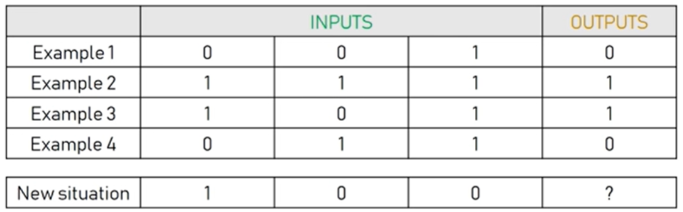

#### 1. Data about criminals and who has commited the crime. 

Example 1 is Jonas, the first field answers the question: does he know Fat Tony, the second - if he has a job, the third - if his height is more than 180cm. Same for Example 2: Petras, etc. And the outputs say if he has a criminal record in the database.

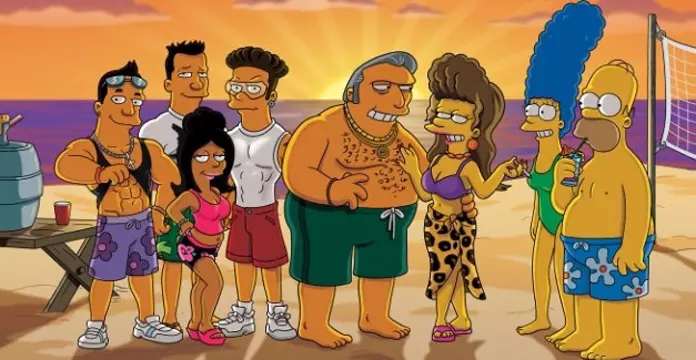

#### 2. anything else you can think of?

## ... other questions are left to answer for the curious reader as homework.